# The Reinforcement Algorithim

Reinforcement alogirthim are ones that we can frame as having an agenr take a sequence of actions wthin some envoroment. The agent could, for example, be a human or an algorithm playing an Atari video game, or it cobe be a human or an algorithm driving a car. Perphaps the primary way that reinforcement algorthim learning problems diverge from supervised/unsupervided ones is that enviroment provides to the agent - that is, the agent receives direct feedback on the actions it takes. 

An agent taking action within an enviroment. In return the envorment returns two types of information:

Reward: This a scalar value that provides quantitavtive feedback on the action that the agent took at timestep t.

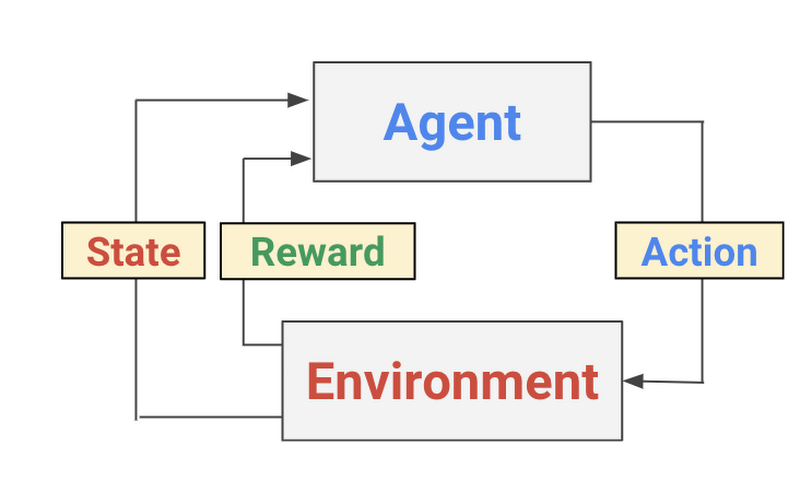


State: this is how the enviroment changes in response to an agent's action. During the forthcoming( t+1) these will be the conditons for the agent to choose an action in.

Reinforcement learning problems are sequential decision-making problems. At the core of this, is process called Marvok Decision Process.

MDP is defined by 5 components:

* S that represents all possible states.
* A represents all possible actions.
* R represents the distribution of reward given a state-action pair.
* P represents the probablity of the next state given a particular state-action pair.
* y(gamma) is a hyperparameter called the discount factor (also known as decay).

The ultimate objective with an MDP is to find a function that enables an agent to take an appropriate action a (from the set of all possible action A) when it encounters any particular state s from the set of all possible envorment states S. In other words, we'd like our agent to learn a function that eneables it to map to A. Such a function is denoted by and we call it the policy function.


In this case the actions are moving the vehicle back and forth, stoping and accelerating.
The enviroment in this case is its surroundings. The state then is the condition of the vehicle surroundings, as perceived by a human agents eyes and ears.

The reward in this case, could be programmed to be positive for every meter of distance traveled towards a destination, negative for minor traffic infractions, and severly negative in the even of an accident.

Actions are the possible ways the object can take. In this case the possible moves the vehicle can make.
The enviroment returns information back to the agent. The information comes in two ways: state and reward. 

In [5]:
#!pip install cmake 'gym[atari]' scipy
import gym

env = gym.make("Taxi-v3").env

env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [6]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [7]:
state = env.encode(0, 2, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 48
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [8]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [9]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 1453
Penalties incurred: 482


In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        #print(frame['frame'].getvalue())
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
        
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 35
State: 108
Action: 5
Reward: -10


In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
q_table.shape

In [ ]:
%%time
"""Training the agent"""

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []
frames = []
for i in range(1, 10_001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        # Q-table update Rule 
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        
        state = next_state
        epochs += 1
        
    
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


 
state = env.encode(0, 2, 1, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)
print(q_table[state])
env.s = state
print(np.argmax(state))
env.render()

In [ ]:
state = env.encode(0, 2, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

In [ ]:
q_table[48]

In [ ]:
"""Evaluate agent's performance after Q-learning"""

total_epochs, total_penalties = 0, 0
episodes = 100_000
frames = []
for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1
        # Put each rendered frame into dict for animation
        frames.append({
            'frame': env.render(mode='ansi'),
            'state': state,
            'action': action,
            'reward': reward
                            }
            )
        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")